In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,recall_score ,accuracy_score,precision_score, f1_score

First part is data preparation, where I check for duplications, missing values, any outliers etc...

In [22]:
#Loading the data
df = pd.read_csv('/Users/quentinvillet/kaggle_project/data/heart.csv')
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [23]:
df.shape

(918, 12)

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [25]:
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [26]:
df.isnull().sum().sort_values(ascending=False)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
df.isnull().sum().sort_values(ascending=False) / len(df)

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [27]:
df.duplicated().sum()

0

Checking for outliers and understanding distribution of each feature

In [31]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])


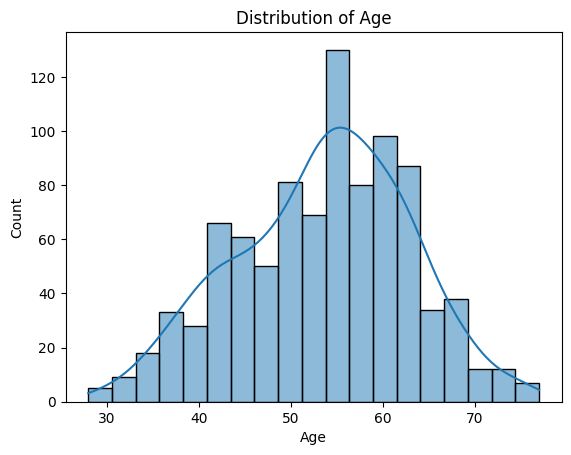

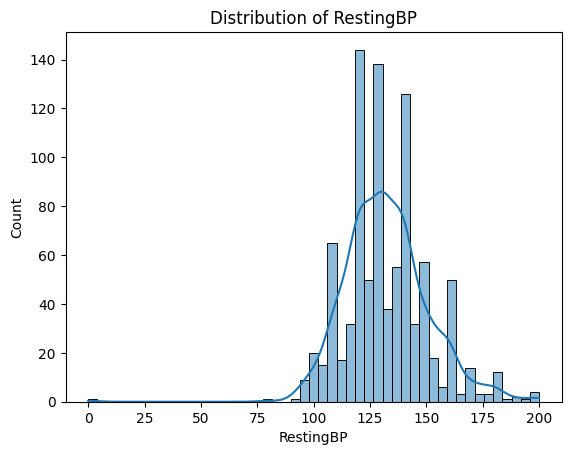

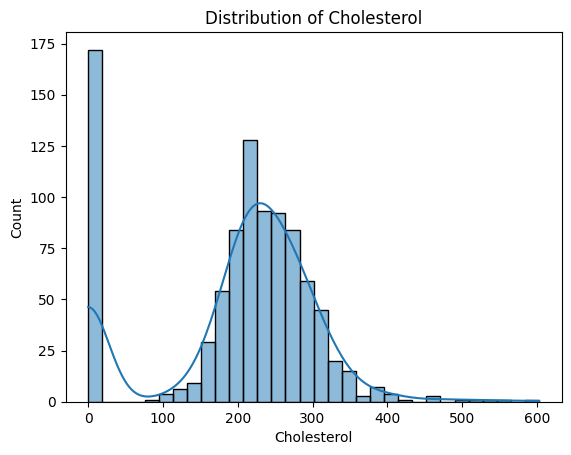

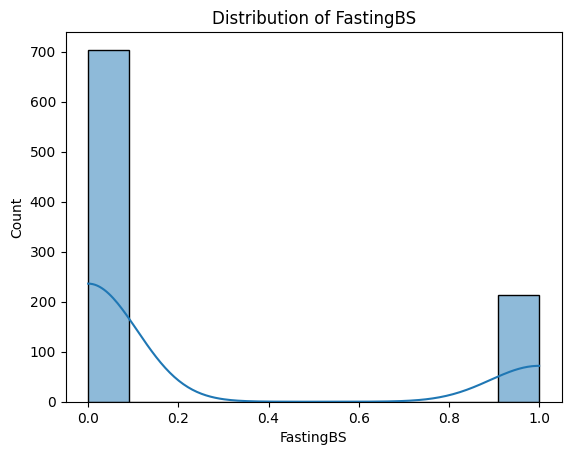

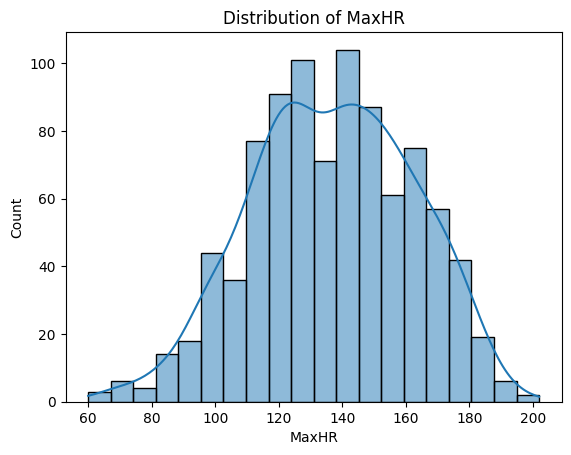

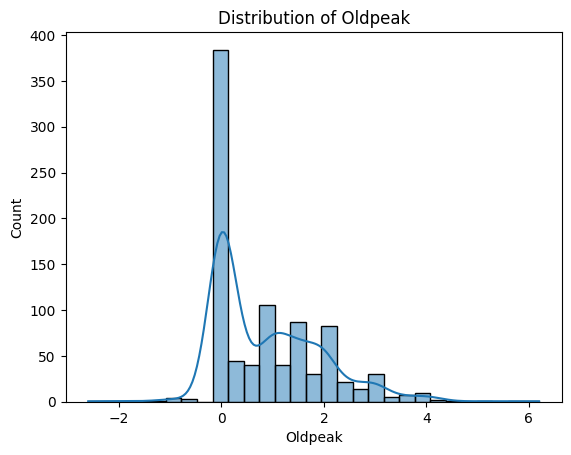

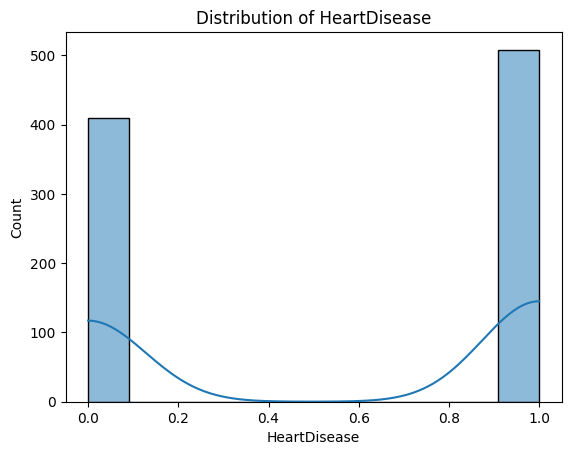

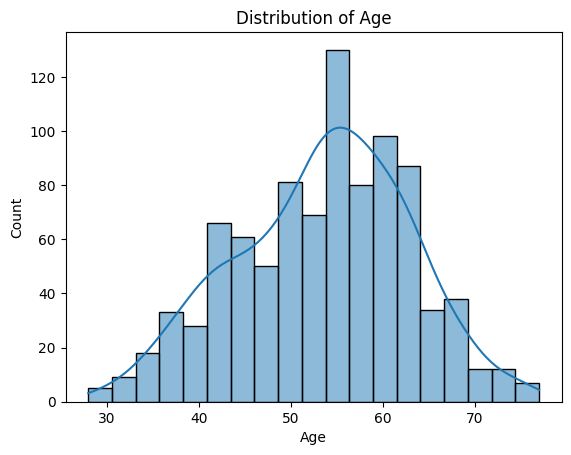

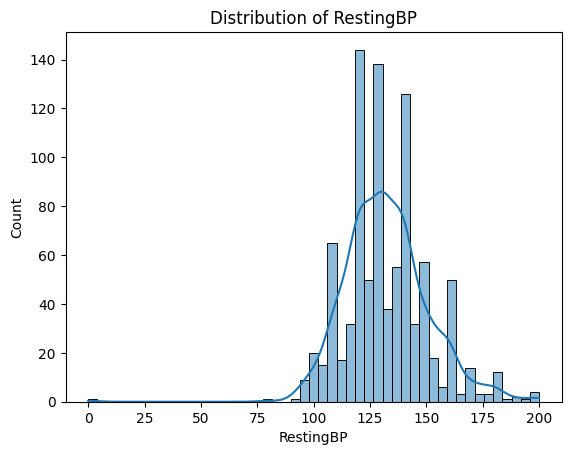

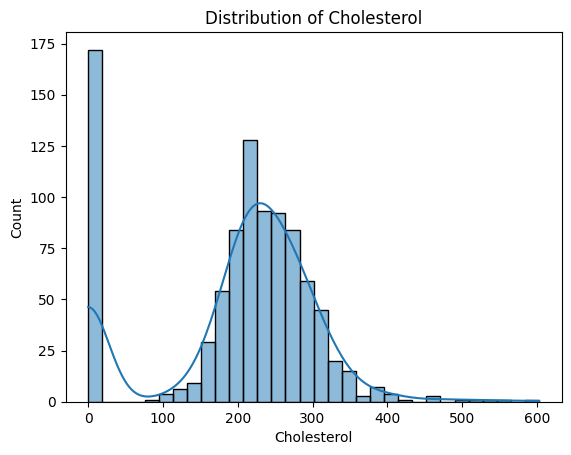

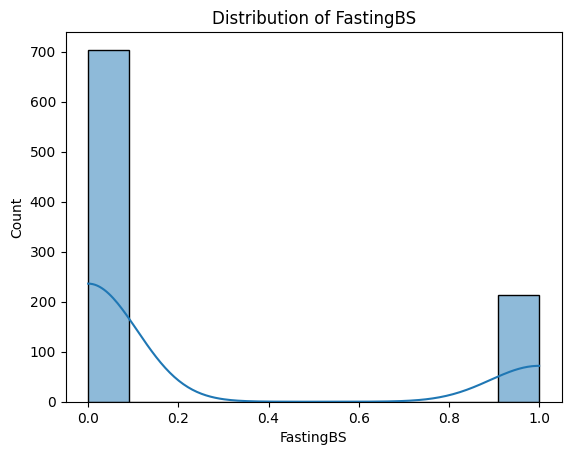

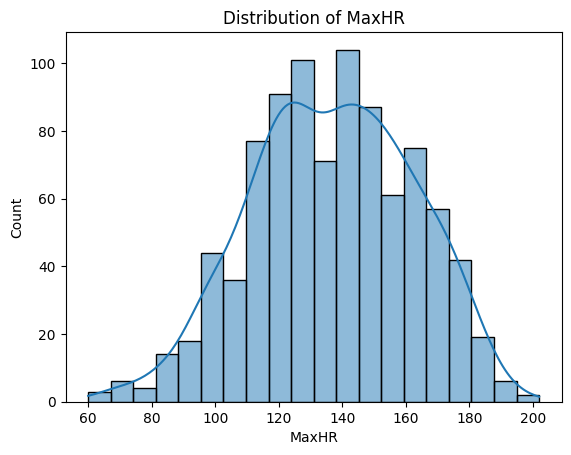

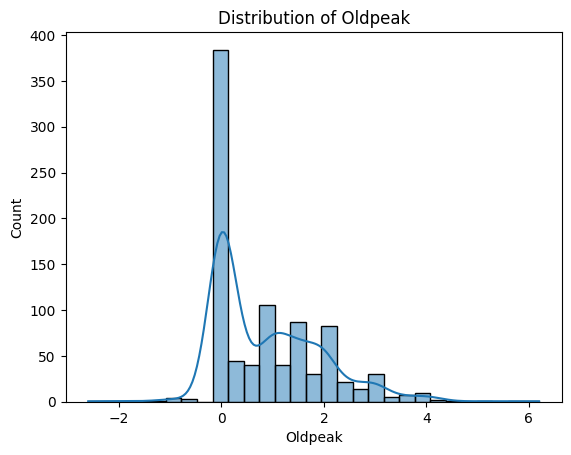

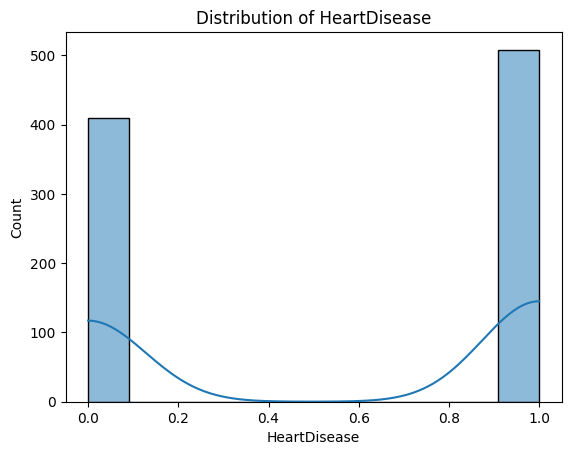

In [33]:
for feature in numerical_data:
    plt.figure()
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

In [35]:
df['HeartDisease'].value_counts()/len(df['HeartDisease'])

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

Checking for correlation between features

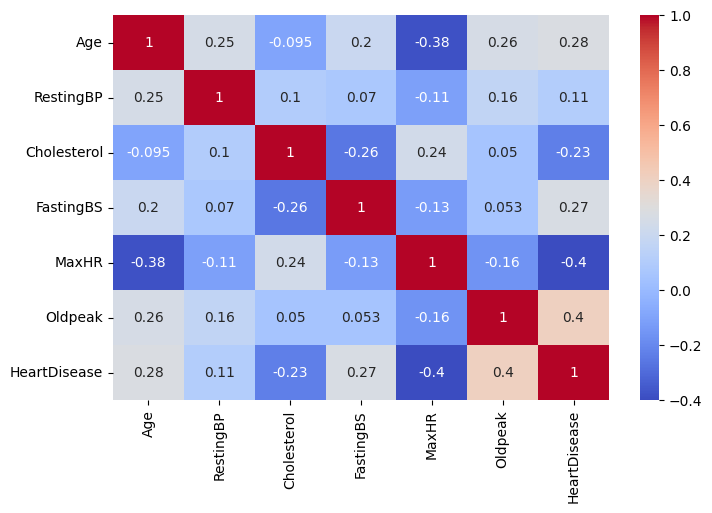

In [43]:
corr_matrix = numerical_data.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True , cmap="coolwarm")
plt.show()


In [44]:
df["Age"].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

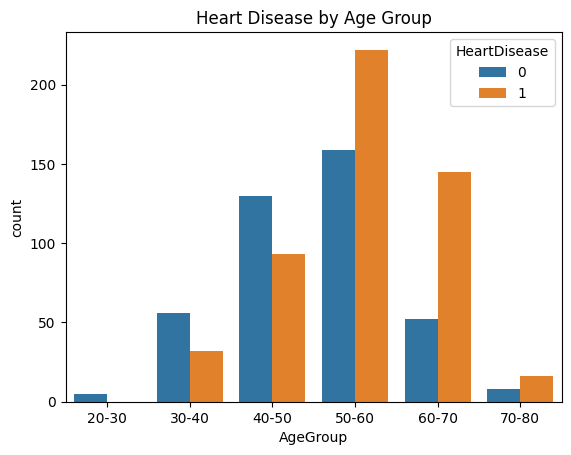

In [50]:
df["AgeGroup"] = pd.cut(df["Age"],bins=[20, 30, 40, 50, 60, 70, 80],labels=["20-30", "30-40", "40-50", "50-60", "60-70", "70-80"])
sns.countplot(data=df, x="AgeGroup", hue="HeartDisease")
plt.title("Heart Disease by Age Group")
plt.show()

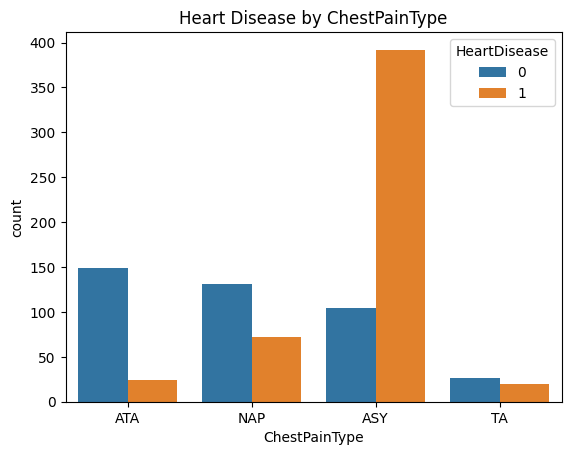

In [69]:
sns.countplot(data=df, x="ChestPainType", hue="HeartDisease")
plt.title("Heart Disease by ChestPainType")
plt.show()

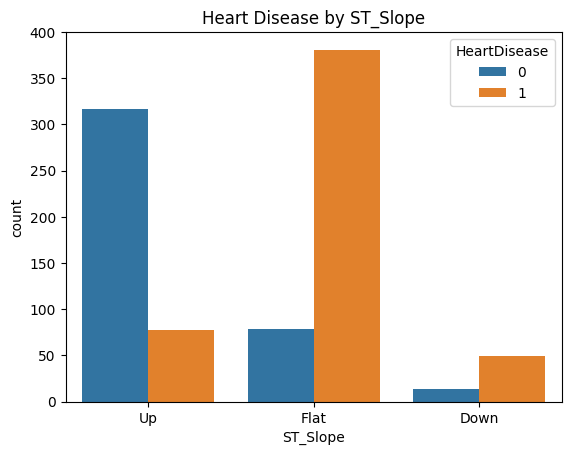

In [71]:
sns.countplot(data=df, x="ST_Slope", hue="HeartDisease")
plt.title("Heart Disease by ST_Slope")
plt.show()

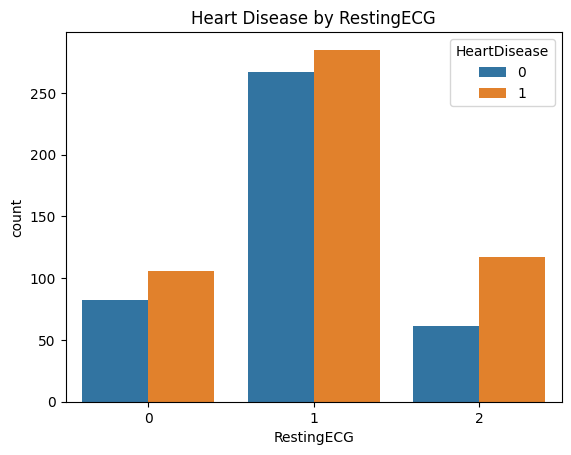

In [76]:
sns.countplot(data=df, x="RestingECG", hue="HeartDisease")
plt.title("Heart Disease by RestingECG")
plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    object  
 2   ChestPainType   918 non-null    object  
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    object  
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    object  
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    object  
 11  HeartDisease    918 non-null    int64   
 12  AgeGroup        918 non-null    category
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 87.3+ KB


This is the process of encoding categorical features into numerical ones using label encoder here (no need to OHE)

In [77]:
# Select categorical columns
Categorical_ordinal = df.select_dtypes(include='object')

In [78]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Instantiate the LabelEncoder
label = LabelEncoder()

# Fit_Transform the targets

for col in Categorical_ordinal:
    df[col] = label.fit_transform(df[col])

In [79]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,40,1,1,140,289,0,1,172,0,0.0,2,0,30-40
1,49,0,2,160,180,0,1,156,0,1.0,1,1,40-50
2,37,1,1,130,283,0,2,98,0,0.0,2,0,30-40
3,48,0,0,138,214,0,1,108,1,1.5,1,1,40-50
4,54,1,2,150,195,0,1,122,0,0.0,2,0,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1,40-50
914,68,1,0,144,193,1,1,141,0,3.4,1,1,60-70
915,57,1,0,130,131,0,1,115,1,1.2,1,1,50-60
916,57,0,1,130,236,0,0,174,0,0.0,1,1,50-60


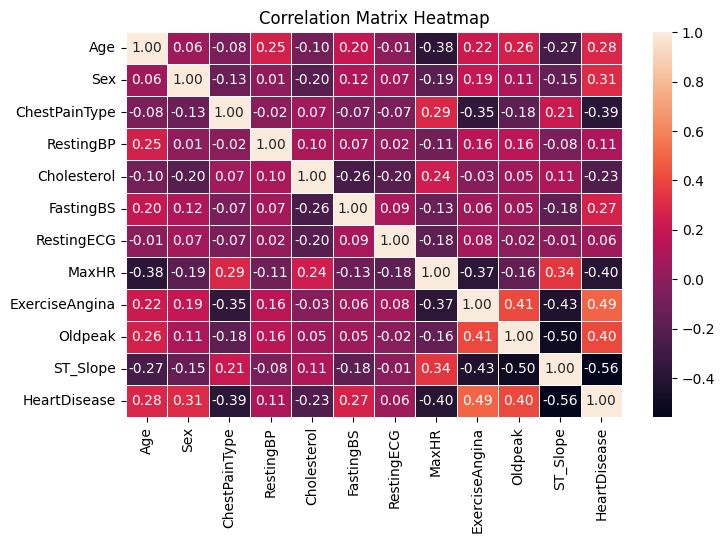

In [83]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


Picking the features (X) and the target (Y)

In [102]:
X = df.drop(['HeartDisease', 'AgeGroup'], axis=1)
y = df['HeartDisease']

Scaling Our data (StandardScaler here is good enough no need robustscaler)

In [103]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

X_scaled = sc.fit_transform(X)


In [108]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled = pd.concat([X_scaled_df, df[['HeartDisease', 'AgeGroup']]], axis=1)
df_scaled

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114,0,30-40
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078,1,40-50
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114,0,30-40
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078,1,40-50
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114,0,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,2.321086,-1.210356,0.596393,-0.551341,0.017255,-0.188999,-0.823556,0.293283,-0.596078,1,40-50
914,1.536902,0.515952,-0.816995,0.627078,-0.053049,1.813758,0.017255,0.164684,-0.823556,2.357094,-0.596078,1,60-70
915,0.370100,0.515952,-0.816995,-0.129513,-0.620168,-0.551341,0.017255,-0.857069,1.214246,0.293283,-0.596078,1,50-60
916,0.370100,-1.938163,0.229032,-0.129513,0.340275,-0.551341,-1.566710,1.461525,-0.823556,-0.832432,-0.596078,1,50-60


Create my train and test groups

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [105]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(734, 11)
(734,)
(184, 11)
(184,)


Modeling: first with Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [107]:
y_pred_logit = model.predict(X_test)

In [140]:
accuracy_logit = accuracy_score(y_test, y_pred_logit)
precision = precision_score(y_test, y_pred_logit)
recall = recall_score(y_test, y_pred_logit)
f1_logit = f1_score(y_test, y_pred_logit)

results1 = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_logit, precision, recall, f1_logit]
})
results1

,Metric,Value
0,Accuracy,0.847826
1,Precision,0.907216
2,Recall,0.822430
3,F1 Score,0.862745


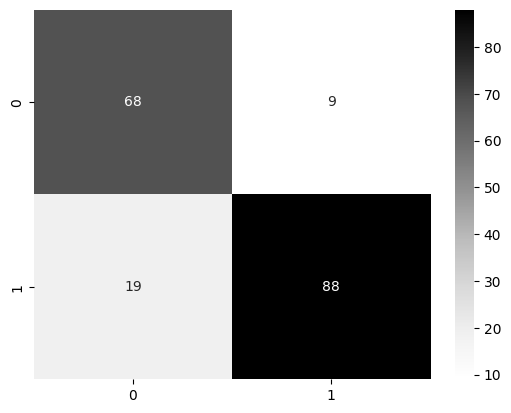

In [127]:
cm = confusion_matrix(y_test, y_pred_logit)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys")
plt.show()

Modeling: next with RandomForestClassifier

In [116]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [117]:
y_pred_RF = model.predict(X_test)


In [141]:
accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision = precision_score(y_test, y_pred_RF)
recall = recall_score(y_test, y_pred_RF)
f1_RF = f1_score(y_test, y_pred_RF)

results2 = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_RF, precision, recall, f1_RF]
})
results2

,Metric,Value
0,Accuracy,0.880435
1,Precision,0.897196
2,Recall,0.897196
3,F1 Score,0.897196


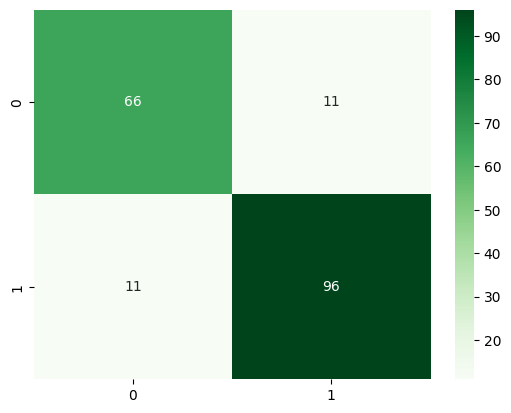

In [126]:
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.show()

Modeling: lastly with SVM

In [120]:
from sklearn.svm import SVC
svm= SVC(random_state=42)

svm.fit(X_train, y_train)

SVC(random_state=42)

In [121]:
y_pred_svm = svm.predict(X_test)

In [142]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

In [143]:
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_svm, precision, recall, f1_svm]
})
results

,Metric,Value
0,Accuracy,0.864130
1,Precision,0.894231
2,Recall,0.869159
3,F1 Score,0.881517


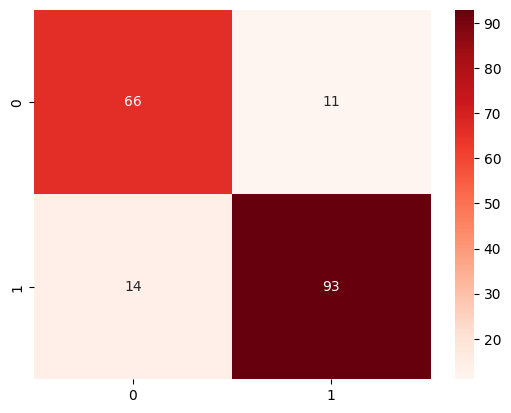

In [128]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.show()

Checking Feature Permutation

In [156]:
df_scaled
X = df.drop(columns=['HeartDisease', 'AgeGroup'])
y = df['HeartDisease']

In [157]:
from sklearn.inspection import permutation_importance

# Fit model
log_model = LogisticRegression().fit(X, y)

# Perform the permutation
permutation_score = permutation_importance(log_model, X, y, n_repeats=10)

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T)
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False)


/Users/quentinvillet/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,feature,score decrease
10,ST_Slope,0.079847
8,ExerciseAngina,0.027233
2,ChestPainType,0.024619
9,Oldpeak,0.019063
1,Sex,0.018083
4,Cholesterol,0.016449
5,FastingBS,0.013399
6,RestingECG,0.000436
7,MaxHR,0.000218
0,Age,-0.001525


In [151]:
final_result = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy_logit, accuracy_RF, accuracy_svm],
    'F1 Score': [f1_logit, f1_RF, f1_svm]
})

In [152]:
final_result.set_index('Model', inplace=True)


In [153]:
final_result

,Accuracy,F1 Score
Model,,
Logistic Regression,0.847826,0.862745
Random Forest,0.880435,0.897196
SVM,0.864130,0.881517


This is the final result, it seems that randomforesrt worked best for this dataset overall